In [1]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt

from chulengo.spatial import SpatialDomain


n_cells = 100

L = 100
dx = L/n_cells

spatial_domain = SpatialDomain(dx, n_cells)
x_edge = spatial_domain.edge()
x_mid = spatial_domain.center()
dx = spatial_domain.dx()

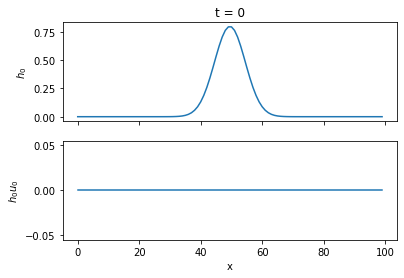

In [2]:
import numpy as np
from scipy.stats import norm

from chulengo.results import Results


h0 = 100
g = 9.81
u0 = 0

u = np.zeros_like(x_mid) + u0
h = np.zeros_like(x_mid)

h = 10*norm.pdf(x_mid, x_mid.mean(), 5) + h0

q_initial = np.stack([h - h0, h*u - h0*u0])

results = Results(spatial_domain, 0, q_initial)
_ = results.plot()
plt.show()

In [3]:
from chulengo.linear import GodunovsMethod
from chulengo.boundary import SolidWallLeftBC, SolidWallRightBC

method = GodunovsMethod(h0, u0, g, dx)
n_left_ghost, n_right_ghost = method.n_ghost_nodes()

left_bc = SolidWallLeftBC(n_left_ghost)
right_bc = SolidWallRightBC(n_right_ghost, n_cells)

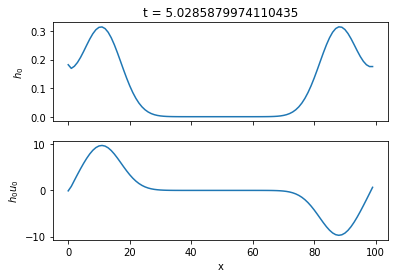

In [4]:
from chulengo.solver import Solver

solver = Solver(q_initial, left_bc, right_bc, method)

results = Results(spatial_domain, 0, q_initial)

t = solver.t()
t_max = 5

while t < t_max:

    q = solver.step()
    t = solver.t()
    
    results.add_results(t, q)

axes = results.plot()

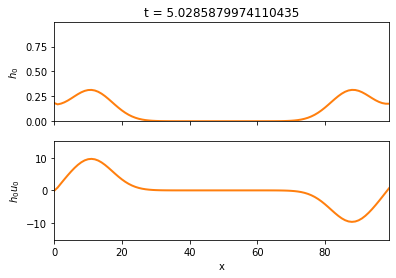

In [5]:
from IPython.display import HTML

from chulengo.notebook import AnimateResults


animate_res = AnimateResults(results)

interval = method.dt()*1e3

anim = animate_res.func_animation(interval=interval, step=1)

HTML(anim.to_jshtml())